# Rigde RegressionとLinear Regressionの比較
Rigde回帰は誤差関数にノイズ項を含めることによって、過学習を抑制することを目指しているモデルです。

In [409]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline


In [410]:
def function(x):
    return 5 * np.sin(x * np.pi / 10)

def function_with_random(x):
    return function(x) + np.random.uniform(-5.0, 5.0)


In [411]:
x_range = 20
y_answer = [function(i) for i in range(x_range)]

X = []
y_train = []
for i in range(x_range):
    X.append(i)
    y = function_with_random(i)
    y_train.append(y)


In [412]:
# グラフの設定
sns.set('poster', 'whitegrid', 'dark', font_scale=1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
sns.set_context({"lines.linewidth": 1})

## 学習
学習実行→多項式の係数出力

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X = np.asarray(X).reshape(-1, 1)
polynomial_features = PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)

# ridge回帰のtrain
poly_reg = Ridge(alpha=10, fit_intercept=False)
reg = poly_reg.fit(X_poly, y_train)
print("==== ridge coef ====")
print(poly_reg.coef_)
print()

# linear回帰のtrain
poly_linear = LinearRegression(fit_intercept=False)
linear = poly_linear.fit(X_poly, y_train)
print("==== linear coef ====")
print(poly_linear.coef_)
print()


==== ridge coef ====
[ -1.35872677e-02   3.33084884e-01  -5.97741956e-02   1.13358753e-01
  -2.16938381e-02   1.38328696e-03  -2.90292472e-05]

==== linear coef ====
[ -3.98079426e+00   9.94272689e+00  -4.73305232e+00   1.01970489e+00
  -1.04889645e-01   5.00111766e-03  -8.90728968e-05]



## グラフ描画

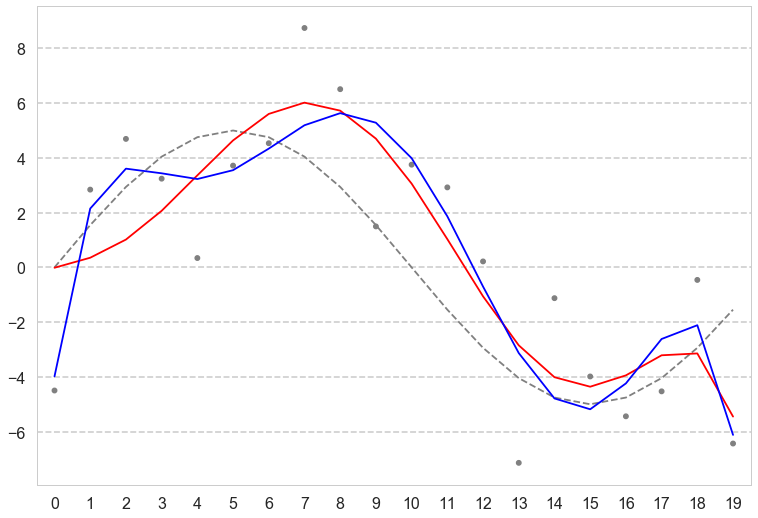

In [444]:
# trainデータと正解のplot
sns.pointplot(x=X.reshape(len(X)), y=y_train, color='gray', join=False)
sns.pointplot(x=X.reshape(len(X)), y=y_answer, linestyles="--", color='gray', markers="")

# 予測した結果をplot
y_ridge = poly_reg.predict(X_poly)
y_linear = poly_linear.predict(X_poly)
sns.pointplot(x=X.reshape(len(X)), y=y_ridge, color='R', markers="")
sns.pointplot(x=X.reshape(len(X)), y=y_linear, color='B', markers="")


## test結果を比較

In [482]:
from sklearn.metrics import mean_squared_error

y_test = [function_with_random(i) for i in range(x_range)]
print(f'rigde_train_error: {np.sqrt(mean_squared_error(y_train, y_reg))}')
print(f'rigde_test_error: {np.sqrt(mean_squared_error(y_test, y_reg))}')

print(f'linear_train_error: {np.sqrt(mean_squared_error(y_train, y_linear))}')
print(f'linear_test_error: {np.sqrt(mean_squared_error(y_test, y_linear))}')


rigde_train_error: 3.8009207105204244
rigde_test_error: 2.665180445057409
linear_train_error: 1.987241639408757
linear_test_error: 3.6306109275834806
